In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Download data from 
# Section - Daily Summary Data  Criteria Gases
# 2017 Ozone(44201) data
df = pd.read_csv('daily_44201_2017.csv',low_memory=False, sep=',')

In [4]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [5]:
aqi = pd.read_csv('annual_aqi_by_county_2017.csv',low_memory=False, sep=',')

In [8]:
#df.head()

In [9]:
#df.dtypes

In [10]:
#df.describe()

In [11]:
#df['State_Name'].unique()

In [12]:
#df['AQI'].head()

In [13]:
#df['Event_Type'].unique()

In [14]:
#df['State_Name'].unique()

In [16]:
#df[df['State_Name'].str.contains('New York',na=False)].count()

In [17]:
#df.AQI.isnull().any()

In [18]:
#df.shape

In [6]:
df1 = df.loc[df.groupby(['County_Name','Date_Local'])['AQI'].idxmax()]

In [7]:
df1.shape

(129233, 29)

In [8]:
#vehicle year group by stop year, convert object to int, replace NON- and UNK with 0
def AQI_CRIT (row):
    if row['AQI'] > 50:
        return 1
    return 0

df1['AQI_critical'] = df1.apply (lambda row: AQI_CRIT (row),axis=1)

In [22]:
#df1.head()

In [9]:
ny = df1[df1['State_Name'].str.contains('New York',na=False)]

In [24]:
#ny.head()

In [10]:
#Finding number of days AQI was greater than 50
ny.groupby('County_Name')["AQI_critical"].sum()

County_Name
Albany         18
Bronx          28
Chautauqua     32
Dutchess       23
Erie           33
Essex          35
Hamilton       19
Herkimer        5
Jefferson       9
Monroe         24
New York       19
Niagara        20
Onondaga       18
Orange          9
Oswego         20
Putnam         29
Queens         33
Richmond       44
Rockland       28
Saratoga       22
Steuben         9
Suffolk        48
Tompkins       11
Wayne          16
Westchester    39
Name: AQI_critical, dtype: int64

In [14]:
ny.groupby('County_Name')["AQI_critical"].sum().plot(kind='bar')

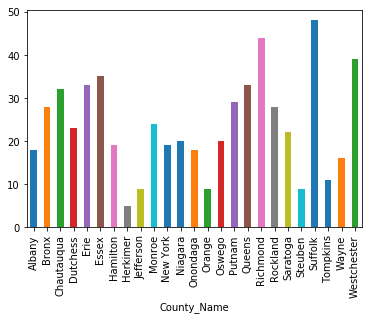

In [15]:
numdays.plot(kind='bar',title="Number of Days with AQI>50 by County")
plt.show()

In [16]:
ny.groupby('County_Name')["AQI_critical"].count()

County_Name
Albany          69
Bronx          276
Chautauqua     250
Dutchess       274
Erie           204
Essex          158
Hamilton        90
Herkimer       236
Jefferson       15
Monroe         124
New York       268
Niagara        194
Onondaga       275
Orange          98
Oswego         276
Putnam         271
Queens         267
Richmond       124
Rockland       276
Saratoga       271
Steuben        269
Suffolk        234
Tompkins       241
Wayne          181
Westchester    274
Name: AQI_critical, dtype: int64

In [17]:
#percentage of days when AQI > 50
ny.groupby('County_Name').agg({'AQI_critical' :['sum',lambda x: x.sum()/ ny['AQI_critical'].sum(),'mean']})

AQI_critical                   
                     sum <lambda>      mean
County_Name                                
Albany                18        0  0.260870
Bronx                 28        0  0.101449
Chautauqua            32        0  0.128000
Dutchess              23        0  0.083942
Erie                  33        0  0.161765
Essex                 35        0  0.221519
Hamilton              19        0  0.211111
Herkimer               5        0  0.021186
Jefferson              9        0  0.600000
Monroe                24        0  0.193548
New York              19        0  0.070896
Niagara               20        0  0.103093
Onondaga              18        0  0.065455
Orange                 9        0  0.091837
Oswego                20        0  0.072464
Putnam                29        0  0.107011
Queens                33        0  0.123596
Richmond              44        0  0.354839
Rockland              28        0  0.101449
Saratoga              22        0  0.081181
Steuben                9        0  0.033457
Suffolk               48        0  0.205128
Tompkins              11        0  0.045643
Wayne                 16        0  0.088398
Westchester           39        0  0.142336

In [18]:
dy = ny.groupby('County_Name').agg({'AQI_critical' :['sum',lambda x: x.sum()/ ny['AQI_critical'].sum(),'mean']})

In [19]:
dy.head()

AQI_critical                   
                     sum <lambda>      mean
County_Name                                
Albany                18        0  0.260870
Bronx                 28        0  0.101449
Chautauqua            32        0  0.128000
Dutchess              23        0  0.083942
Erie                  33        0  0.161765

In [38]:
#Next I copy this data to a dat file in linux, and use Vim editor to generate formatted data
# using in google maps visualization
# Eachj county is represented using a flag, clicking on which gives an estimate of number of days 
#in a year AQI > 50 for that county

In [94]:
#There are multiple entries for a day, replace by max AQI
#ny[ny['County_Name'] == "Essex"]["Date_Local"].value_counts()

In [95]:
#ny[ny['County_Name'] == "Essex"][["Date_Local"],["AQI"]]

In [20]:
import seaborn as sns

In [21]:
dfnew = ny.groupby('County_Name').AQI.mean()

In [22]:
dfnew.head()

County_Name
Albany        41.028986
Bronx         36.293478
Chautauqua    41.092000
Dutchess      37.000000
Erie          40.416667
Name: AQI, dtype: float64

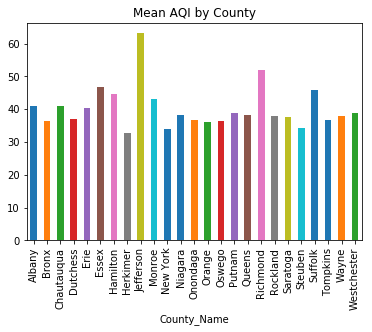

In [23]:
dfnew.plot("bar",title="Mean AQI by County")
plt.show()

In [26]:
#ny.groupby('County_Name').AQI.max()

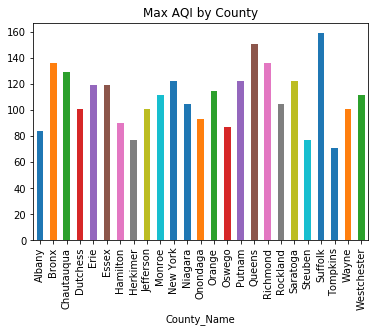

In [27]:
ny.groupby('County_Name').AQI.max().plot("bar",title="Max AQI by County")
plt.show()